In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ebayScraper.py
## Used for generating {category}.csv
### (API Keys have been removed)

```python

import requests
import time
import os
import re
from bs4 import BeautifulSoup

#
# View Item URL is used to scrape seller data
#

view_item = 'https://api.ebay.com/buy/browse/v1/item/v1|{ITEM NUMBER HERE}|0'

#
# Completed Items is API URL for finding completed items... Update Category ID # for category you want to scrape
#

completed_items = 'http://svcs.ebay.com/services/search/FindingService/v1?OPERATION-NAME=findCompletedItems&SECURITY-APPNAME=APIKEY&RESPONSE-DATA-FORMAT=JSON&REST-PAYLOAD&keywords=&categoryId={INPUT CATEGORY ID HERE}&itemFilter(0).name=ListingType&itemFilter(0).value=FixedPrice&paginationInput.entriesPerPage=100&paginationInput.pageNumber=1&sortOrder=StartTimeNewest'

#
# Authorization Token is constantly updating
#

headers = {'Authorization':'API KEY'}

r = requests.get(completed_items)
data = r.json()
number_of_pages = data['findCompletedItemsResponse'][0]['paginationOutput'][0]['totalPages'][0]
print('Number of Pages: '+number_of_pages)

with open('dataframe.csv','w') as dataframe:
        dataframe.write('item_number, item_title, payment_method, postal_code, shipping_method, sales_price, selling_state, best_offer, bin_available, start_time, end_time, listing_type, returns_accepted, condition, top_rated, seller, feedback_percentage, feedback_score, description\n')

count = 0

#
# Rename CSV for {category}.csv
#

with open('dataframe.csv','a') as dataframe:
    for i in range (1,int(number_of_pages)):
        completed_items = 'http://svcs.ebay.com/services/search/FindingService/v1?OPERATION-NAME=findCompletedItems&SECURITY-APPNAME=APIKEY&RESPONSE-DATA-FORMAT=JSON&REST-PAYLOAD&keywords=&categoryId=%2011450&itemFilter(0).name=ListingType&itemFilter(0).value=FixedPrice&paginationInput.entriesPerPage=100&paginationInput.pageNumber='+str(i)+'&sortOrder=StartTimeNewest'
        r = requests.get(completed_items, headers=headers)
        data = r.json()

        for j in range (0,100):
            item_number = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['itemId'][0]
            item_title = str(data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['title'][0]).replace(",", "")
            item_title = item_title.replace('"', "")
            item_title = item_title.replace("'", "")
            try:
                payment_method = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['paymentMethod'][0]
            except:
                payment_method = 'NA'
            try:
                postal_code = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['postalCode'][0]
            except:
                postal_code = '00000'
            # location = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['location'][0]
            shipping_method = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['shippingInfo'][0]['shippingType'][0]
            sales_price = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['sellingStatus'][0]['convertedCurrentPrice'][0]['__value__']
            selling_state = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['sellingStatus'][0]['sellingState'][0]
            best_offer = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['listingInfo'][0]['bestOfferEnabled'][0]
            bin_available = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['listingInfo'][0]['buyItNowAvailable'][0]
            start_time = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['listingInfo'][0]['startTime'][0]
            end_time = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['listingInfo'][0]['endTime'][0]
            listing_type = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['listingInfo'][0]['listingType'][0]
            returns_accepted = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['returnsAccepted'][0]
            try:
                condition = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['condition'][0]['conditionId'][0]
            except:
                condition = 'NA'
            top_rated = data['findCompletedItemsResponse'][0]['searchResult'][0]['item'][j]['topRatedListing'][0]

            print(item_number)
            count += 1
            print('\033c')
            print(str(count) +" items | pages:  "+ str(i))

            view_item = 'https://www.ebay.com/itm/'+str(item_number)+'?_trksid=p2349526.m4383.l10137.c10&nordt=true&rt=nc&orig_cvip=true0'
            try:
                r = requests.get(view_item)
                soup = BeautifulSoup(r.text, 'html.parser')

                seller = soup.find(class_='mbg-nw').text

                feedback_percentage = soup.find(id='si-fb')
                feedback_percentage = re.sub("[^0-9.]", "", str(feedback_percentage))

                feedback_score = soup.find(class_='mbg-l')
                feedback_score = re.sub("[^0-9]", "", str(feedback_score.text))

                #
                # View Description is URL for scraping item description, only len() is used
                #

                view_description = 'https://vi.vipr.ebaydesc.com/ws/eBayISAPI.dll?ViewItemDescV4&item='+str(item_number)
                r = requests.get(view_description)
                soup = BeautifulSoup(r.text, 'html.parser')

                print(view_description)

                description = soup.find(id='ds_div')
                description = len(description.text)

            except:
                print('excepted')
                time.sleep(1)
                seller = 'NA'
                feedback_percentage = 'NA'
                feedback_score = 'NA'
                description = 'NA'

            line = [item_number, item_title, payment_method, postal_code, shipping_method, sales_price, selling_state, best_offer, bin_available, start_time, end_time, listing_type, returns_accepted, condition, top_rated, seller, feedback_percentage, feedback_score, str(description)+'\n']
            dataframe.write(','.join(str(v) for v in line))
```

## Read each individual category's CSV into its own pandas dataframe

In [2]:
iphones = pd.read_csv('iphones.csv')
books = pd.read_csv('books.csv')
clothing = pd.read_csv('clothing.csv')
collectables = pd.read_csv('collectables.csv')
healthbeauty = pd.read_csv('healthbeauty.csv')
homegarden = pd.read_csv('homegarden.csv')
music = pd.read_csv('music.csv')
sporting = pd.read_csv('sporting.csv')

# Test Columns
iphones.columns

Index(['item_number', ' item_title', ' payment_method', ' postal_code',
       ' shipping_method', ' sales_price', ' selling_state', ' best_offer',
       ' bin_available', ' start_time', ' end_time', ' listing_type',
       ' returns_accepted', ' condition', ' top_rated', ' seller',
       ' feedback_percentage', ' feedback_score', ' description'],
      dtype='object')

In [3]:
dataframes = [
    iphones,
    books,
    clothing,
    collectables,
    healthbeauty,
    homegarden,
    music,
    sporting
]

0      0 days 00:04:25
1      0 days 00:05:15
2      0 days 00:12:48
3      0 days 00:00:34
4      0 days 00:36:15
             ...      
9995   3 days 16:26:01
9996   3 days 16:26:06
9997   3 days 16:26:10
9998   3 days 16:26:17
9999   3 days 18:36:43
Name: time_to_sell, Length: 10000, dtype: timedelta64[ns]

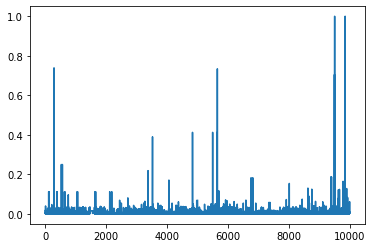

In [4]:
scaler = MinMaxScaler()


for df in dataframes:
    df[' description'] = scaler.fit_transform(df[[' description']])
    df[' start_time'] = pd.to_datetime(df[' start_time'])
    df[' end_time'] = pd.to_datetime(df[' end_time'])
    df['time_to_sell'] =  df[' end_time'] - df[' start_time']
    
# Test to see scaler applied
collectables[' description']
plt.plot(collectables[' description'])

# Test that time to sell is correctly calculated with pd.to_datetime
music['time_to_sell']

In [5]:
test = iphones[(iphones[' feedback_score']) < 1 &
        (iphones[' description'] < 0.002) &
        (pd.isnull(iphones[' feedback_percentage']) == True)]

test[' start_time'] = pd.to_datetime(test[' start_time'])
test[' end_time'] = pd.to_datetime(test[' end_time'])
test['Diff'] =  test[' end_time'] - test[' start_time']
# test[[' start_time', ' end_time', 'Diff']]
iphones['time_to_sell'].mean()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

Timedelta('1 days 20:35:17.641715')

In [6]:
iphone_scams = iphones[(iphones[' feedback_score']) < 1 &
        (iphones[' description'] < 0.002) &
        (pd.isnull(iphones[' feedback_percentage']) == True)]

books_scams = books[(books[' feedback_score']) < 1 &
        (books[' description'] < 0.002) &
        (pd.isnull(books[' feedback_percentage']) == True)]

clothing_scams = clothing[(clothing[' feedback_score']) < 1 &
        (clothing[' description'] < 0.002) &
        (pd.isnull(clothing[' feedback_percentage']) == True)]

collectables_scams = collectables[(collectables[' feedback_score']) < 1 &
        (collectables[' description'] < 0.002) &
        (pd.isnull(collectables[' feedback_percentage']) == True)]

healthbeauty_scams = healthbeauty[(healthbeauty[' feedback_score']) < 1 &
        (healthbeauty[' description'] < 0.002) &
        (pd.isnull(healthbeauty[' feedback_percentage']) == True)]

homegarden_scams = homegarden[(homegarden[' feedback_score']) < 1 &
        (homegarden[' description'] < 0.002) &
        (pd.isnull(homegarden[' feedback_percentage']) == True)]

music_scams = music[(music[' feedback_score']) < 1 &
        (music[' description'] < 0.002) &
        (pd.isnull(music[' feedback_percentage']) == True)]

sporting_scams = sporting[(sporting[' feedback_score']) < 1 &
        (sporting[' description'] < 0.002) &
        (pd.isnull(sporting[' feedback_percentage']) == True)]

In [7]:
iphone_scamrate = len(iphone_scams) / len(iphones)
book_scamrate = len(books_scams) / len(books)
clothing_scamrate = len(clothing_scams) / len(clothing)
collectable_scamrate = len(collectables_scams) / len(collectables)
healthbeauty_scamrate = len(healthbeauty_scams) / len(healthbeauty)
homegarden_scamrate = len(homegarden_scams) / len(homegarden)
music_scamrate = len(music_scams) / len(music)
sporting_scamrate = len(sporting_scams) / len(sporting)

scamrate_list = [
    iphone_scamrate,
    book_scamrate,
    clothing_scamrate,
    collectable_scamrate,
    healthbeauty_scamrate,
    homegarden_scamrate,
    music_scamrate,
    sporting_scamrate,
]

scamrate_list = list(map(lambda x: x * 100, scamrate_list))

In [8]:
print(scamrate_list)

[3.3115755434457155, 0.30120481927710846, 1.6199999999999999, 0.97009700970097, 1.66, 1.52, 0.13, 0.6]


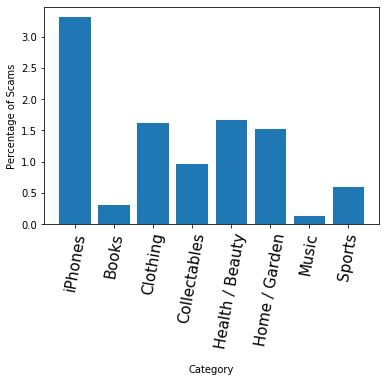

In [9]:
catname_list = [
    'iPhones',
    'Books',
    'Clothing',
    'Collectables',
    'Health / Beauty',
    'Home / Garden',
    'Music',
    'Sports',
]
index = np.arange(len(catname_list))
plt.bar(index, scamrate_list)
plt.xticks(index, catname_list, fontsize=15, rotation=80)
plt.ylabel("Percentage of Scams")
plt.xlabel("\nCategory")
plt.show()

In [10]:
iphone_tts = iphones['time_to_sell'].mean()
book_tts = books['time_to_sell'].mean()
clothing_tts = clothing['time_to_sell'].mean()
collectable_tts = collectables['time_to_sell'].mean()
healthbeauty_tts = healthbeauty['time_to_sell'].mean()
homegarden_tts = homegarden['time_to_sell'].mean()
music_tts = music['time_to_sell'].mean()
sporting_tts = sporting['time_to_sell'].mean()

tts_list = [
    iphone_tts,
    book_tts,
    clothing_tts,
    collectable_tts,
    healthbeauty_tts,
    homegarden_tts,
    music_tts,
    sporting_tts,
]

tts_list

[Timedelta('1 days 20:35:17.641715'),
 Timedelta('1 days 00:10:01.058534'),
 Timedelta('0 days 00:49:50.149600'),
 Timedelta('0 days 09:09:20.019501'),
 Timedelta('0 days 12:30:05.909000'),
 Timedelta('0 days 07:17:00.824100'),
 Timedelta('0 days 22:28:04.634800'),
 Timedelta('0 days 05:08:54.786900')]

In [11]:
iphonescam_tts = iphone_scams['time_to_sell'].mean()
bookscam_tts = books_scams['time_to_sell'].mean()
clothingscam_tts = clothing_scams['time_to_sell'].mean()
collectablescam_tts = collectables_scams['time_to_sell'].mean()
healthbeautyscam_tts = healthbeauty_scams['time_to_sell'].mean()
homegardenscam_tts = homegarden_scams['time_to_sell'].mean()
musicscam_tts = music_scams['time_to_sell'].mean()
sportingscam_tts = sporting_scams['time_to_sell'].mean()

scamtts_list = [
    iphonescam_tts,
    bookscam_tts,
    clothingscam_tts,
    collectablescam_tts,
    healthbeautyscam_tts,
    homegardenscam_tts,
    musicscam_tts,
    sportingscam_tts,
]

scamtts_list

[Timedelta('0 days 08:44:25.663652'),
 Timedelta('0 days 02:18:35.766666'),
 Timedelta('0 days 00:26:14.098765'),
 Timedelta('0 days 02:08:25.092783'),
 Timedelta('0 days 12:21:28.174698'),
 Timedelta('0 days 08:59:21.578947'),
 Timedelta('0 days 11:50:45.076923'),
 Timedelta('0 days 03:59:23.416666')]

In [12]:
for a,b in zip(scamtts_list, tts_list):
    print(a.total_seconds() / b.total_seconds())
    
tts_list = [ x.total_seconds() for x in tts_list ]
scamtts_list = [ x.total_seconds() for x in scamtts_list ]


0.19602620195888096
0.09558236194796643
0.5264280975881608
0.23377088059820916
0.9884963038696764
1.2341938157225196
0.527233349430614
0.774943717678567


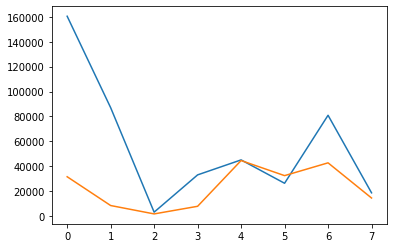

In [14]:
plt.plot(tts_list)
plt.plot(scamtts_list)